# Exercise 1
### Q:

Let us consider a database containing the relative consumption of certain food items in European countries. The numbers represent the percentage of the population consuming that food type.


```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(’https://openmv.net/file/food-consumption.csv’).fillna(0)
data
data.describe()
A = data.to_numpy()[:,1:].T.astype(np.float64)
countries = data.to_numpy()[:,0]
foods = np.array(data.columns[1:])
```
Each column of the matrix A refers to a country, and each row represents a specific food. The arrays countries
and foods contain the list of countries and foods, respectively.
-  How many samples and features are there in the dataset?
-  Perform PCA on the dataset by means of the SVD decomposition. Then, plot the trend of
	- the singular values $\sigma_k$;
	- the cumulative fraction of singular values $\frac{\sum_{i=1}^k \sigma_i}{\sum_{i=1}^q \sigma_i}$;
	- the fraction of the "explained variance" $\frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^q \sigma_i^2}$
-  Print the first two principal directions. Which are the more important foods for these two directions? <br>Knowing that mediterranean cuisine envisages a large use of garlic and olive oil, compared to the European
average, do you expect a positive or negative 1st principal component for Italy?
-  Print the first two principal components. Based on these results:
   - In which European region do you expect a large consume of crisp bread? Why? Is this confirmed by
   the original data?
   - Which countries have food habits that are similar to Italy?
   - Based on the two first principal components, what do you expect about the food habits in England? <br>Is this confirmed by the original data?

### A:

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('https://openmv.net/file/food-consumption.csv').fillna(0)

In [132]:
data

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19.0,57.0,51,19,21,27,...,81,75,44,71,22,91,85,74,30.0,26
1,Italy,82,10,60,2.0,55.0,41,3,2,4,...,67,71,9,46,80,66,24,94,5.0,18
2,France,88,42,63,4.0,76.0,53,11,23,11,...,87,84,40,45,88,94,47,36,57.0,3
3,Holland,96,62,98,32.0,62.0,67,43,7,14,...,83,89,61,81,15,31,97,13,53.0,15
4,Belgium,94,38,48,11.0,74.0,37,23,9,13,...,76,76,42,57,29,84,80,83,20.0,5
5,Luxembourg,97,61,86,28.0,79.0,73,12,7,26,...,85,94,83,20,91,94,94,84,31.0,24
6,England,27,86,99,22.0,91.0,55,76,17,20,...,76,68,89,91,11,95,94,57,11.0,28
7,Portugal,72,26,77,2.0,22.0,34,1,5,20,...,22,51,8,16,89,65,78,92,6.0,9
8,Austria,55,31,61,15.0,29.0,33,1,5,15,...,49,42,14,41,51,51,72,28,13.0,11
9,Switzerland,73,72,85,25.0,31.0,69,10,17,19,...,79,70,46,61,64,82,48,61,48.0,30


In [133]:
data.describe()

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
count,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,78.562500,39.250000,78.500000,16.875000,56.87500,49.000000,18.312500,12.750000,21.875000,15.87500,66.812500,70.500000,41.937500,55.187500,42.312500,75.812500,69.125000,54.187500,19.250000,27.750000
std,23.145824,23.147354,18.540047,11.453529,24.44279,15.427249,20.178268,9.574271,13.980343,12.78997,17.581122,14.033294,23.256451,22.592679,34.677022,20.910026,26.849891,28.842604,19.042059,25.026652
min,27.000000,10.000000,40.000000,0.000000,0.00000,27.000000,1.000000,2.000000,4.000000,2.00000,22.000000,42.000000,8.000000,16.000000,5.000000,31.000000,24.000000,13.000000,0.000000,3.000000
25%,71.500000,17.000000,62.500000,9.250000,49.00000,36.250000,3.750000,6.500000,13.750000,6.50000,56.750000,65.250000,28.000000,40.250000,11.000000,64.500000,47.750000,29.500000,4.500000,10.500000
50%,89.000000,39.000000,84.500000,17.000000,62.00000,47.000000,11.500000,10.000000,19.500000,13.00000,71.500000,72.000000,43.000000,54.000000,25.500000,83.000000,79.000000,52.500000,12.000000,21.000000
75%,96.000000,54.250000,92.250000,25.750000,74.50000,58.000000,20.000000,17.000000,26.250000,21.50000,81.000000,77.250000,50.750000,72.000000,81.500000,94.000000,94.000000,83.250000,30.250000,31.000000
max,98.000000,86.000000,99.000000,35.000000,91.00000,75.000000,76.000000,39.000000,54.000000,45.00000,87.000000,94.000000,89.000000,91.000000,91.000000,97.000000,97.000000,94.000000,57.000000,93.000000


In [134]:
A = data.to_numpy()[:,1:].T.astype(np.float64)
countries = data.to_numpy()[:,0]
foods = np.array(data.columns[1:])

In [135]:
# How many samples and features are there in the dataset?
print('Number of samples:', A.shape[1])
print('Number of features:', A.shape[0])

Number of samples: 16
Number of features: 20


#### Question:
Perform PCA on the dataset by means of the SVD decomposition. Then, plot the trend of
- the singular values $\sigma_k$;
- the cumulative fraction of singular values $\frac{\sum_{i=1}^k \sigma_i}{\sum_{i=1}^q \sigma_i}$;
- the fraction of the "explained variance" $\frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^q \sigma_i^2}$

#### Answer:

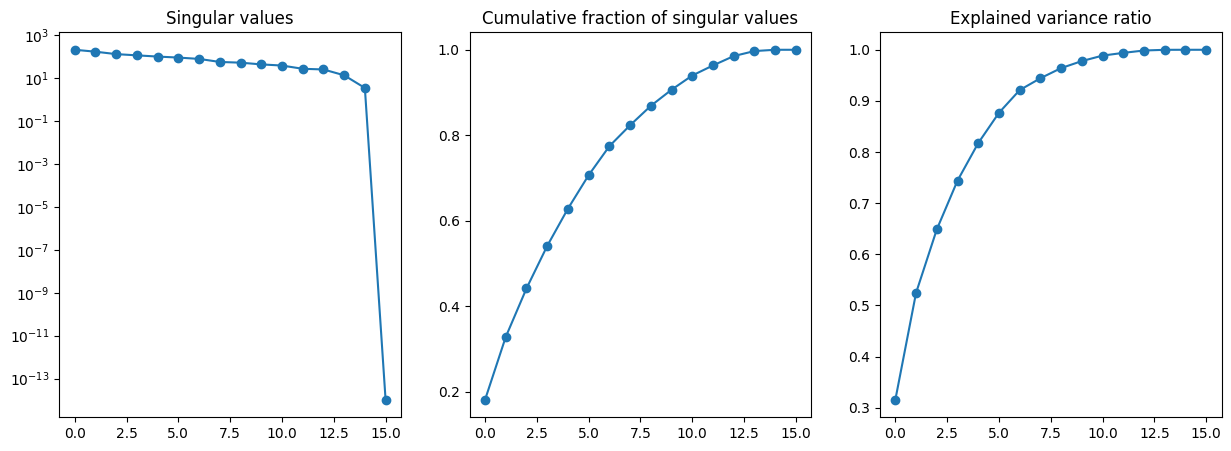

In [136]:
# 1. Center the data
A_centered = A - np.mean(A, axis=1)[:, None]
# Note: classical procedure would be to divide by the standard deviation,
# 		but in this case all features are already in the same scale so it's 
# 		not necessary.

# 2. Perform SVD
U, s, Vt = np.linalg.svd(A_centered, full_matrices=False)

# 3. Plot the trends of
#	- the singular values
#	- the cumulative fraction of singular values
# 	- the explained variance ratio

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].semilogy(s, 'o-')
ax[0].set_title('Singular values')
ax[1].plot(np.cumsum(s)/np.sum(s), 'o-')
ax[1].set_title('Cumulative fraction of singular values')
ax[2].plot(np.cumsum(s**2)/np.sum(s**2), 'o-')
ax[2].set_title('Explained variance ratio')
plt.show()


#### Comment:

The values of singular values slowly decreases in a quite smooth funtion apart from the last singular value which beeing very small suggests that the matrix can be considered not full rank (10^-13 is in the realm of machine precision). 
Still the smooth decrease of the singular values suggests that there is not a clear cut in the number of principal components that we should consider, given that almost all of them apper to be relevant.
Nonetheless is important to note how just the first 2 principal components alrealy explain more than 50% of the variance in the data, which indicates that a dimensionality reduction may be useful, in particular in visualizing the data.

#### Question:
Print the first two principal directions.
#### Answer:

In [137]:
# 4. Compute the two principal directions
principal_directions = U.T[:2]

# 5. Print the first two principal directions
pc_df = pd.DataFrame({
	'Food': foods,
	'First PC': principal_directions[0],
	'Second PC': principal_directions[1]
})
pc_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Food,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
First PC,0.037985,-0.133786,-0.26879,-0.160447,-0.119544,-0.083328,-0.285098,-0.056791,-0.095524,-0.144741,-0.12603,-0.040271,-0.296081,-0.336152,0.571526,-0.104272,-0.177213,0.341024,0.003733,-0.208456
Second PC,-0.181943,0.45509,-0.007872,-0.018023,0.359837,0.233876,0.124603,-0.047842,-0.153367,-0.081881,0.244723,0.132488,0.301617,0.07463,0.265614,0.109335,0.043426,0.194447,0.275335,-0.393938


#### Question:
Which are the more important foods for these two directions?
#### Answer:

In [138]:
# Which are the more important foods for these two directions?

print("\nMost important foods in first principal direction:")
print(pc_df.sort_values(by='First PC', key=abs, ascending=False)[:5].T[:2])

print("\nMost important foods in second principal direction:")
print(pc_df.sort_values(by='Second PC', key=abs, ascending=False)[:5].T[0:3:2])




Most important foods in first principal direction:
                14         17        13            12        6 
Food        Garlic  Olive oil       Jam  Tinned fruit  Tin soup
First PC  0.571526   0.341024 -0.336152     -0.296081 -0.285098

Most important foods in second principal direction:
                       1            19        4             12        18
Food       Instant coffee  Crisp bread  Biscuits  Tinned fruit   Yoghurt
Second PC         0.45509    -0.393938  0.359837      0.301617  0.275335


#### Question:
Knowing that mediterranean cuisine envisages a large use of garlic and olive oil, 
compared to the European average, do you expect a positive or negative 1st 
principal component for Italy?
#### Answer:
Given that along the first principal components Garlic and Olive oil are the most important foods, with positive weights, we can expect that Italy will have a positive first principal component.



#### Question:
Print the first two principal components. Based on these results:
1. In which European region do you expect a large consume of crisp bread? Why? Is this confirmed by
the original data?
2. Which countries have food habits that are similar to Italy?
3. Based on the two first principal components, what do you expect about the food habits in England? <br>Is this confirmed by the original data?

#### Answer:

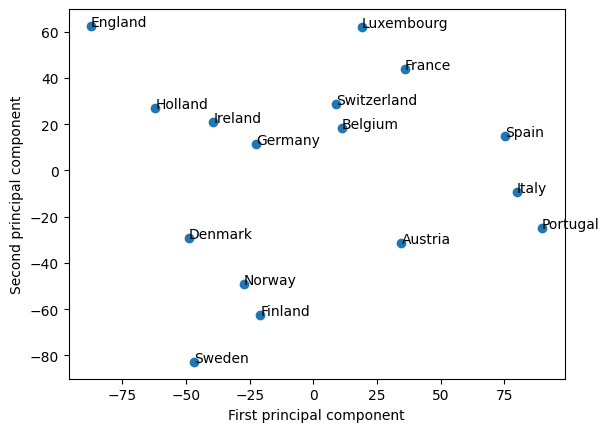

In [139]:
# 6. compute the projection of the data on the first two principal directions
principal_components = A_centered.T @ principal_directions.T

# 7. Plot the projection of the data on the first two principal directions
fig, ax = plt.subplots()
ax.scatter(principal_components[:,0], principal_components[:,1])
for i, country in enumerate(countries):
	ax.annotate(country, (principal_components[i,0], principal_components[i,1]))
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
plt.show()

In [140]:
# Display data for Nordic countries
nordic_data = data[data['Country'].isin(['Sweden', 'Norway', 'Finland'])]
nordic_data

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
10,Sweden,97,13,93,31.0,0.0,43,43,39,54,...,56,78,53,75,9,68,32,48,2.0,93
12,Norway,92,17,83,13.0,62.0,51,4,17,30,...,61,72,34,51,11,63,94,28,2.0,62
13,Finland,98,12,84,20.0,64.0,27,10,8,18,...,50,57,22,37,15,96,94,17,0.0,64


1. Crisp bread consumption is expected to be high in Northern Europe, particularly in countries like Sweden, Norway, and Finland due to their traditional food habits. This is confirmed by the original data, where the consumption of it is 93%, 62% and 64% respectively for Sweden, Norway and Finland (whereas the mean is 28%). Furthermore this can be guessed as these countries have low values in the second principal componet which is inversely related to the consumption of crisp bread (weight for crisp bread is -0.39). 

2. Countries with similar food habits to Italy are expected to have similar values in the first two principal components. Based on the data, countries like Spain and Portugal have similar food habits to Italy. Which is to be expected given that all of them follow a mediterranean diet.

In [141]:
data.loc[data['Country'] == 'England']

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
6,England,27,86,99,22.0,91.0,55,76,17,20,...,76,68,89,91,11,95,94,57,11.0,28


In [142]:
data.describe()

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
count,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,78.562500,39.250000,78.500000,16.875000,56.87500,49.000000,18.312500,12.750000,21.875000,15.87500,66.812500,70.500000,41.937500,55.187500,42.312500,75.812500,69.125000,54.187500,19.250000,27.750000
std,23.145824,23.147354,18.540047,11.453529,24.44279,15.427249,20.178268,9.574271,13.980343,12.78997,17.581122,14.033294,23.256451,22.592679,34.677022,20.910026,26.849891,28.842604,19.042059,25.026652
min,27.000000,10.000000,40.000000,0.000000,0.00000,27.000000,1.000000,2.000000,4.000000,2.00000,22.000000,42.000000,8.000000,16.000000,5.000000,31.000000,24.000000,13.000000,0.000000,3.000000
25%,71.500000,17.000000,62.500000,9.250000,49.00000,36.250000,3.750000,6.500000,13.750000,6.50000,56.750000,65.250000,28.000000,40.250000,11.000000,64.500000,47.750000,29.500000,4.500000,10.500000
50%,89.000000,39.000000,84.500000,17.000000,62.00000,47.000000,11.500000,10.000000,19.500000,13.00000,71.500000,72.000000,43.000000,54.000000,25.500000,83.000000,79.000000,52.500000,12.000000,21.000000
75%,96.000000,54.250000,92.250000,25.750000,74.50000,58.000000,20.000000,17.000000,26.250000,21.50000,81.000000,77.250000,50.750000,72.000000,81.500000,94.000000,94.000000,83.250000,30.250000,31.000000
max,98.000000,86.000000,99.000000,35.000000,91.00000,75.000000,76.000000,39.000000,54.000000,45.00000,87.000000,94.000000,89.000000,91.000000,91.000000,97.000000,97.000000,94.000000,57.000000,93.000000


3. Based on the first two principal components, England is expected to have a small consumption of olive oil, garlic and crisp bread, while having a lot of consumption of jam, instant coffee and biscutis. This can be guessed because the value of the first principal component should be low (low garlic, olive oil and much jam) while the value of the second one should be high (low crisp bread, high instant coffee and biscuits). This is also reflected by the original data where instant coffee, biscuits and jam have values of 86-39=47, 91-57=34 and 91-55=36 with respect to the mean, while crisp bread, garlic and olive oil have respectively values of 28-28=0, 11-42=-31, 57-54=3.

# Exercise 2 

### Q:

Consider the data provided in file ex2.zip. Each row of the matrix X corresponds to one
training example (x(i) ∈ R2 ) and the corresponding row of the vector y is the label. The dataset contains m = 2000 samples.
```python
import numpy as np
X = np.genfromtxt(’x.txt’)
y = np.genfromtxt(’y.txt’)
```
- Consider the logistic regression model
  $$h_{w,b}(x) = \frac{1}{1 + \exp(-w^Tx - b)}$$
  Implement the stochastic gradient descent method for the logistic regression. Leave the data in the original order. Start with w = 0, b = 0, consider a learning rate equal to 0.01 and perform 5 epochs (i.e loops through your entire training set 5 times and hence, since you have 2,000 training examples, this corresponds to 10,000 iterations of SGD). Run the stochastic gradient descent and plot the parameter b as a function of the number of iterations taken. Do you see this plot having a “wavy” appearance? What do you think causes this?
- Repeat the previous problem, but now shuffle the training set first.
  ```python
	p = np.random.permutation(2000)
	Xp = X[p,:]
	yp = y[p,:] 
  ```
  Re-run stochastic gradient descent using the shuffled data (again start with w = 0, b = 0, consider a learning rate equal to 0.01 and perform 5 epochs) and replot b as a function of the number of iterations. How is this plot different from the previous one?
- Report the obtained values for w and b.

## Note: 
The data for this exercise was not provided, so I generated a random dataset to test the code. The code to generate the data is the one in the next cell.

This implies that comments and results may not be accurate for the original data.

In [143]:
import numpy as np
from sklearn.datasets import make_classification

np.random.seed(42)
# Generate synthetic data
X, y = make_classification(
    n_samples=2000,    # Number of samples
    n_features=2,      # Two features
    n_informative=2,   # Both features are informative
    n_redundant=0,     # No redundant features
    n_clusters_per_class=1, # Single cluster per class
    class_sep=1.5,     # Separation between classes
    random_state=42    # For reproducibility
)

### 2a:
Consider the logistic regression model
  $$h_{w,b}(x) = \frac{1}{1 + \exp(-w^Tx - b)}$$
  Implement the stochastic gradient descent method for the logistic regression. Leave the data in the original order. Start with w = 0, b = 0, consider a learning rate equal to 0.01 and perform 5 epochs (i.e loops through your entire training set 5 times and hence, since you have 2,000 training examples, this corresponds to 10,000 iterations of SGD). Run the stochastic gradient descent and plot the parameter b as a function of the number of iterations taken. Do you see this plot having a “wavy” appearance? What do you think causes this?

### A:

  0%|          | 0/5 [00:00<?, ?it/s]

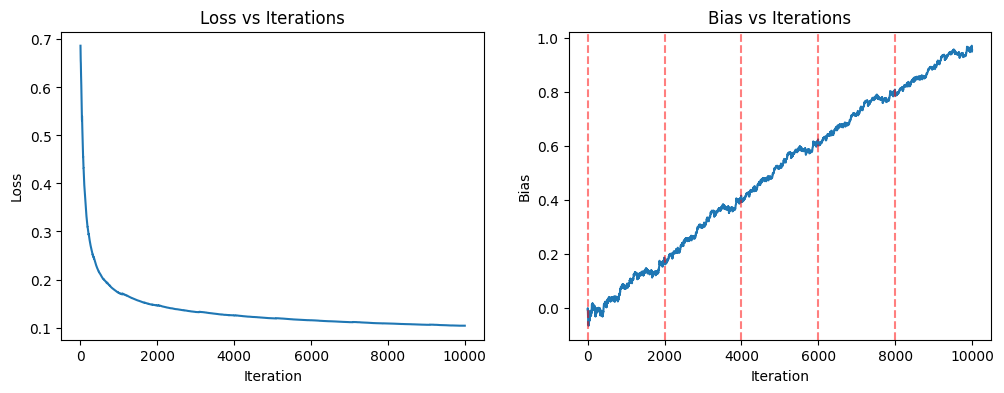

In [144]:
from tqdm.notebook import tqdm
import jax
import jax.numpy as jnp

def sigmoid(x):
	return 1 / (1 + jnp.exp(-x))

def loss_fn(w, b, x, y):
	logits = sigmoid(jnp.dot(x, w) + b)
	return -jnp.mean(y * jnp.log(logits + 1e-10) + (1 - y) * jnp.log(1 - logits + 1e-10))

def sgd(X, y, w, b, learning_rate=0.01, n_epochs=5):
	weights = []
	biases = []
	losses = []
	loss_jit = jax.jit(loss_fn)
	grad_fn = jax.grad(loss_jit, argnums=(0, 1))
	
	for epoch in tqdm(range(n_epochs)):
		for i in range(X.shape[0]):
			x_i = X[i:i+1]  # Keep dimensions for single sample
			y_i = y[i]
			
			w_grad, b_grad = grad_fn(w, b, x_i, y_i)
			
			w = w - learning_rate * w_grad
			b = b - learning_rate * b_grad
			
			weights.append(w)
			biases.append(b)
			losses.append(loss_jit(w, b, X, y))
	
	return jnp.array(weights), jnp.array(biases), jnp.array(losses)

# Initialize parameters
w = jnp.zeros(2)
b = 0.

# Run SGD
weights, biases, losses = sgd(X, y, w, b)

# Plot the results
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(losses)
plt.title('Loss vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(122)
plt.plot(biases)
for i in range(0, 10000, 2000):
	plt.axvline(i, color='red', linestyle='--', alpha=0.5)
plt.title('Bias vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Bias')
plt.show()




#### Comment:
It is clearly present a periodicity in the bias parameter update over the SGD iterations. In particular there is a clear periodicity of 2000 iterations, which is the size of the dataset. This is due to the fact that the data is not shuffled, and hence the order of the data is always the same. This means that the bias parameter is always updated in a similar way over different epochs.

### 2b:

Repeat the previous problem, but now shuffle the training set first.
```python
p = np.random.permutation(2000)
Xp = X[p,:]
yp = y[p,:] 
```
Re-run stochastic gradient descent using the shuffled data (again start with w = 0, b = 0, consider a learning rate equal to 0.01 and perform 5 epochs) and replot b as a function of the number of iterations. How is this plot different from the previous one?

### A:

  0%|          | 0/5 [00:00<?, ?it/s]

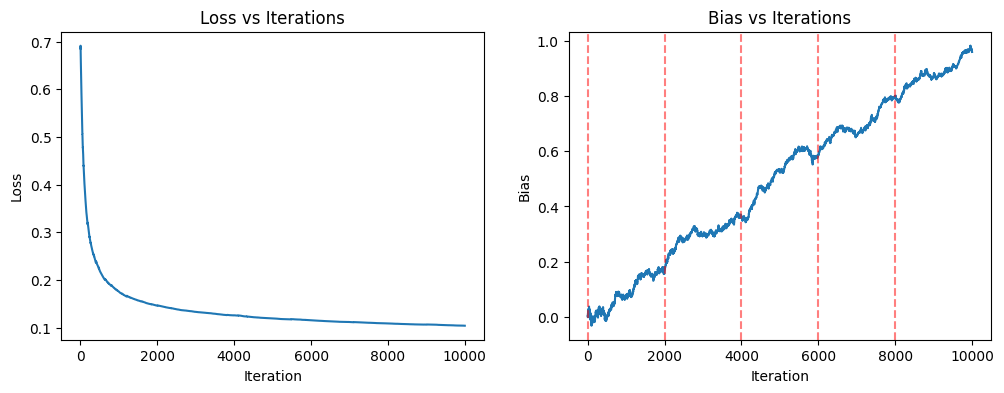

In [145]:
def sgd_permuted(X, y, w, b, learning_rate=0.01, n_epochs=5):
	weights = []
	biases = []
	losses = []
	loss_jit = jax.jit(loss_fn)
	grad_fn = jax.grad(loss_jit, argnums=(0, 1))
	
	for epoch in tqdm(range(n_epochs)):
		p = np.random.permutation(X.shape[0])
		X_permuted = X[p]
		y_permuted = y[p]
		for i in range(X.shape[0]):
			x_i = X_permuted[i:i+1]  # Keep dimensions for single sample
			y_i = y_permuted[i]
			
			w_grad, b_grad = grad_fn(w, b, x_i, y_i)
			
			w = w - learning_rate * w_grad
			b = b - learning_rate * b_grad
			
			weights.append(w)
			biases.append(b)
			losses.append(loss_jit(w, b, X, y))
	
	return jnp.array(weights), jnp.array(biases), jnp.array(losses)

# Initialize parameters
w = jnp.zeros(2)
b = 0.

# Run SGD
weights_permuted, biases_permuted, losses_permuted = sgd_permuted(X, y, w, b)

# Plot the results
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(losses_permuted)
plt.title('Loss vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(122)
plt.plot(biases_permuted)
for i in range(0, 10000, 2000):
	plt.axvline(i, color='red', linestyle='--', alpha=0.5)
plt.title('Bias vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Bias')
plt.show()

#### Comment:
The plot of the bias parameter over the iterations is now not smoother but no longer presents the periodicity that was present in the previous plot. This is due to the fact that the data is now shuffled, and hence the bias parameter is updated in a different way over different epochs.
A noisy behaviour still present due to the stochastic nature of the algorithm.

### 2c:

Report the obtained values for w and b.

### A:

In [146]:
print("weights sdg", weights[-1], "biases sdg", biases[-1])
print("weights sdg_permuted", weights_permuted[-1], "biases sdg_permuted", biases_permuted[-1])

weights sdg [ 3.2412999 -1.6767558] biases sdg 0.9534936
weights sdg_permuted [ 3.2857974 -1.6267827] biases sdg_permuted 0.9590595


# Exercise 3 

Consider the following mapping:
<div style="text-align: center;">
(0, 0, 0) → 1, (1, 0, 0) → 0, (0, 1, 0) → 0, (0, 0, 1) → 0,

(0, 1, 1) → 1, (1, 1, 0) → 0, (1, 0, 1) → 0, (1, 1, 1) → 1.
</div>

1. Is it possible to learn the previous map using only a single perceptron?
2. Propose a multi-perceptron neural network that is able to learn the previous mapping. Compute the
weights and the biases of all the perceptrons in the network.

![image.png](./3_image.png)

In [147]:
# Testing the proposed model
def perceptron(x, w, b):
	return 1 if jnp.dot(x, w) + b >= 0 else 0

def model(x, weights, biases):
	out1 = perceptron(x, weights[0], biases[0])
	out2 = perceptron(x, weights[1], biases[1])
	out3 = perceptron(jnp.array([out1, out2]), weights[2], biases[2])
	return out3

X = jnp.array([[0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 1, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1]])
y = jnp.array([1, 0, 0, 0, 1, 0, 0, 1])

weights = [jnp.array([0, -1, 1]), jnp.array([-1/2, +3/4, -1/2]), jnp.array([1, 1])]
biases = [0, 1/4, -2]

for i in range(X.shape[0]):
	x_i = X[i]
	y_i = y[i]
	
	y_pred = model(x_i, weights, biases)
	print(f'Input: {x_i}, Target: {y_i}, Predicted: {y_pred}')
	# assert y_pred == y_i, 'Model is not correct!'


Input: [0 0 0], Target: 1, Predicted: 1
Input: [1 0 0], Target: 0, Predicted: 0
Input: [0 1 0], Target: 0, Predicted: 0
Input: [0 0 1], Target: 0, Predicted: 0
Input: [0 1 1], Target: 1, Predicted: 1
Input: [1 1 0], Target: 0, Predicted: 0
Input: [1 0 1], Target: 0, Predicted: 0
Input: [1 1 1], Target: 1, Predicted: 1
